# Descriptors

## Molecular Descriptors

> Molecular descriptors can be defined as mathematical representations of molecules’ properties that are generated by algorithms. The numerical values of molecular descriptors are used to quantitatively describe the physical and chemical information of the molecules. An example of molecular descriptors is the LogP which is a quantitative representation of the [lipophilicity](https://www.sciencedirect.com/topics/pharmacology-toxicology-and-pharmaceutical-science/lipophilicity) of the molecules, it is obtained by measuring the partitioning of the molecule between an aqueous phase and a lipophilic phase which consists usually of water/*n*-octanol. - [source](https://www.sciencedirect.com/topics/medicine-and-dentistry/molecular-descriptor)
> 

Molecular descriptors can generally classified in four ways:

![Descriptors_1.png](./images/Descriptors_1.png)

([source](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics_OLCC_(2019)/05%3A_5._Quantitative_Structure_Property_Relationships/5.03%3A_Molecular_Descriptors))

## Tutorial

In this tutorial, we’ll show how descriptors can be useful as filters in the drug discovery process. This tutorial was inspired from the [TeachOpenCADD talktorial](https://projects.volkamerlab.org/teachopencadd/talktorials/T002_compound_adme.html?highlight=descriptors), we highly encourage you to read through the theory, understand ADME and why we care about it in the drug discovery process from the talktorial before diving into this tutorial. It provides the necessary background information to fully understand the purpose of this tutorial. 

The set of descriptors that will be focused on today are: 

- Molecular weight ≤ 500 Da
- Number of hydrogen bond acceptors (HBAs) ≤ 10
- Number of hydrogen bond donors (HBD) ≤ 5
- Calculated LogP (octanol-water coefficient) ≤ 5

These descriptors and their limits are collectively known as **[Lipinkski’s rule of five (Ro5)](https://www.sciencedirect.com/science/article/abs/pii/S0169409X96004231)**, this is a method used to estimate a compounds bioavailability based solely on its chemical structure. If a molecule violates any of the rules listed above (i.e. a molecular weight of 700 Da), it’s probable that the compound will **exhibit poor absorption or permeation** and subsequently be removed from your list.

This tutorial will show you a real-world scenario of 

- **Part 1:** Obtaining a virtual screening library from **[Enamine](https://enamine.net/compound-libraries/targeted-libraries/dna-library)**
    - The DNA library is designed to identify novel active compounds against proteins which are essential for DNA stability.  At 5530 compounds, this is one of Enamine’s smaller libraries. The same functions could easily be applied to some of the larger libraries using Datamol’s parallelize functions.
    - _Note: for this tutorial, we are loading a truncated VS Enamine library._
- **Part 2:** Then calculate the relevant molecular properties for the Ro5 for the list
- **Part 3:** Investigate compliance with Ro5
- **Part 4:** And finally, revealing the statistics for the dataset of compounds using Ro5 as a filter. With this, we will be able to find the answer to our question; how many fulfill vs. violate Ro5?
    - Subsequently, we can show different ways of displaying the data to make it more visually appealing using Matplotlib

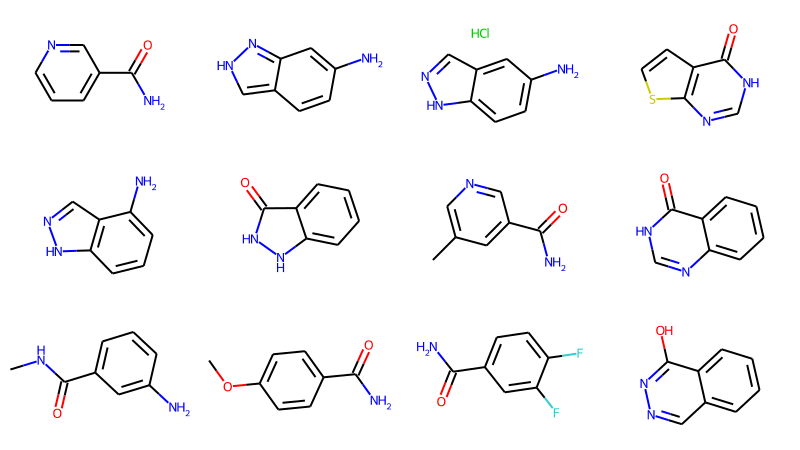

In [11]:
import datamol as dm

# Part 1: Obtain a list of molecules and visualize
# Load sdf downloaded from Enamine with the flag as_df set to True
# This will automatically create a 'smiles' column from the sdf file
data = dm.read_sdf("./data/Enamine_DNA_Libary_5530cmpds_20200831_SMALL.sdf", as_df=True)

data["mol"] = data["smiles"].apply(dm.to_mol)

mols = data["mol"].tolist()

dm.to_image(mols[:12], mol_size=(200, 150))

Number of aromatic atoms in the compound is 6


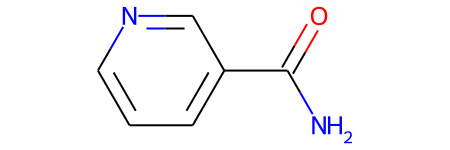

In [12]:
# Calculate a specific descriptor for a compound
n_aromatic_atoms = dm.descriptors.n_aromatic_atoms(dm.copy_mol(mols[0]))
print("Number of aromatic atoms in the compound is", n_aromatic_atoms)

mols[0]

In [14]:
# Part 2: Calculate the relevant molecular properties for the Ro5 for the list

# Calculate many descriptors for a compound
dm.descriptors.compute_many_descriptors(mols[150])

{'mw': 210.009913052,
 'fsp3': 0.125,
 'n_lipinski_hba': 5,
 'n_lipinski_hbd': 1,
 'n_rings': 2,
 'n_hetero_atoms': 6,
 'n_heavy_atoms': 14,
 'n_rotatable_bonds': 1,
 'n_radical_electrons': 0,
 'tpsa': 71.66999999999999,
 'qed': 0.7539078378657419,
 'clogp': 0.7626199999999999,
 'sas': 2.5248498164613675,
 'n_aliphatic_carbocycles': 0,
 'n_aliphatic_heterocyles': 0,
 'n_aliphatic_rings': 0,
 'n_aromatic_carbocycles': 0,
 'n_aromatic_heterocyles': 2,
 'n_aromatic_rings': 2,
 'n_saturated_carbocycles': 0,
 'n_saturated_heterocyles': 0,
 'n_saturated_rings': 0}

In [15]:
# Batch compute many descriptors for a list of compounds
df = dm.descriptors.batch_compute_many_descriptors(mols)
df

,mw,fsp3,n_lipinski_hba,n_lipinski_hbd,n_rings,n_hetero_atoms,n_heavy_atoms,n_rotatable_bonds,n_radical_electrons,tpsa,...,sas,n_aliphatic_carbocycles,n_aliphatic_heterocyles,n_aliphatic_rings,n_aromatic_carbocycles,n_aromatic_heterocyles,n_aromatic_rings,n_saturated_carbocycles,n_saturated_heterocyles,n_saturated_rings
0,122.048013,0.000000,3,2,1,3,9,1,0,55.98,...,1.690816,0,0,0,0,1,1,0,0,0
1,133.063997,0.000000,3,3,2,3,10,0,0,54.70,...,2.795444,0,0,0,1,1,2,0,0,0
2,169.040675,0.000000,3,3,2,4,11,0,0,54.70,...,2.381662,0,0,0,1,1,2,0,0,0
3,152.004434,0.000000,3,1,2,4,10,0,0,45.75,...,2.591944,0,0,0,0,2,2,0,0,0
4,133.063997,0.000000,3,3,2,3,10,0,0,54.70,...,2.232651,0,0,0,1,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,337.092578,0.176471,4,1,2,7,24,5,0,55.40,...,1.761027,0,0,0,2,0,2,0,0,0
877,335.109291,0.384615,7,5,1,10,23,7,0,113.68,...,2.716945,0,0,0,1,0,1,0,0,0
878,426.216809,0.240000,7,1,5,7,32,5,0,65.77,...,2.215072,0,1,1,2,2,4,0,1,1
879,460.087308,0.086957,7,0,5,9,32,6,0,82.52,...,2.379198,0,0,0,2,3,5,0,0,0


In [17]:
# Part 3: Investigate compliance with Ro5

df = df[df["mw"] <= 500]
df = df[df["n_lipinski_hba"] <= 10]
df = df[df["n_lipinski_hbd"] <= 5]
df = df[df["clogp"] <= 5]
df

# 863 of the 881 compounds in the dataset satisfy all criteria in the rule of 5

,mw,fsp3,n_lipinski_hba,n_lipinski_hbd,n_rings,n_hetero_atoms,n_heavy_atoms,n_rotatable_bonds,n_radical_electrons,tpsa,...,sas,n_aliphatic_carbocycles,n_aliphatic_heterocyles,n_aliphatic_rings,n_aromatic_carbocycles,n_aromatic_heterocyles,n_aromatic_rings,n_saturated_carbocycles,n_saturated_heterocyles,n_saturated_rings
0,122.048013,0.000000,3,2,1,3,9,1,0,55.98,...,1.690816,0,0,0,0,1,1,0,0,0
1,133.063997,0.000000,3,3,2,3,10,0,0,54.70,...,2.795444,0,0,0,1,1,2,0,0,0
2,169.040675,0.000000,3,3,2,4,11,0,0,54.70,...,2.381662,0,0,0,1,1,2,0,0,0
3,152.004434,0.000000,3,1,2,4,10,0,0,45.75,...,2.591944,0,0,0,0,2,2,0,0,0
4,133.063997,0.000000,3,3,2,3,10,0,0,54.70,...,2.232651,0,0,0,1,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,363.115381,0.157895,6,0,4,7,26,5,0,69.63,...,2.148096,0,0,0,2,2,4,0,0,0
876,337.092578,0.176471,4,1,2,7,24,5,0,55.40,...,1.761027,0,0,0,2,0,2,0,0,0
877,335.109291,0.384615,7,5,1,10,23,7,0,113.68,...,2.716945,0,0,0,1,0,1,0,0,0
878,426.216809,0.240000,7,1,5,7,32,5,0,65.77,...,2.215072,0,1,1,2,2,4,0,1,1


<AxesSubplot:xlabel='clogp', ylabel='Count'>

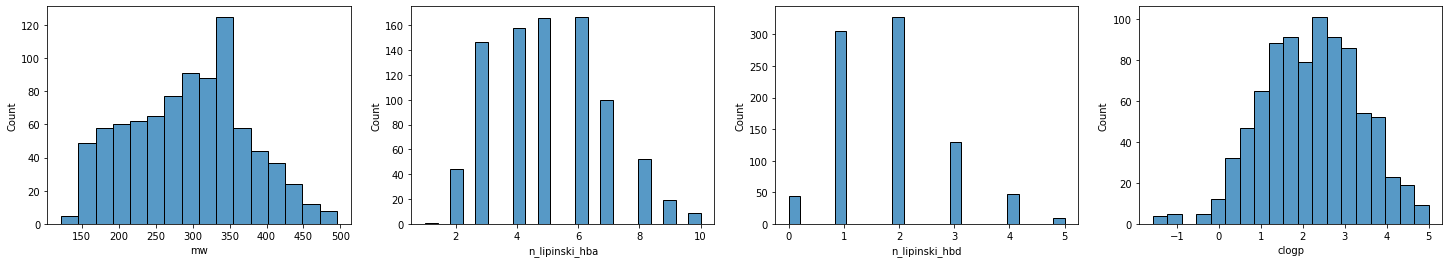

In [23]:
# Part 4: Reveal the statistics for the dataset of compounds using Ro5 as a filter. How many fulfill vs. violate Ro5?
# Plotting the RO5 descriptors

import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=4, figsize=(25, 4))

sns.histplot(df, x="mw", ax=axs[0])
sns.histplot(df, x="n_lipinski_hba", ax=axs[1])
sns.histplot(df, x="n_lipinski_hbd", ax=axs[2])
sns.histplot(df, x="clogp", ax=axs[3])

If you’re curious to learn more about some of the other established rules in the drug discovery industry, feel free to run this list through a Google search: 

- Rules of CNS
- BBB score
- Rule of Egan
- Rule-of-5
- Beyond Rule-of-5
- Rule-of-4
- Ghose Filter
- Zinc Rule
- Rule of GSK (4/400)
- Lead-Like Soft Rule
- Oprea’s Rule
- Pfizer Rule (3/75)
- REOS Filter
- Rule-of-3
- Extended Rule-of-3
- Veber Filter

## References:

- TeachOpenCADD - [https://projects.volkamerlab.org/teachopencadd/talktorials/T002_compound_adme.html?highlight=descriptors](https://projects.volkamerlab.org/teachopencadd/talktorials/T002_compound_adme.html?highlight=descriptors)
- ADME criteria ([Wikipedia](https://en.wikipedia.org/wiki/ADME) and [Mol Pharm. (2010), 7(5), 1388-1405](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3025274/))
- What are lead compounds? ([Wikipedia](https://en.wikipedia.org/wiki/Lead_compound))
- What is the LogP value? ([Wikipedia](https://en.wikipedia.org/wiki/Partition_coefficient))
- Lipinski et al. “Experimental and computational approaches to estimate solubility and permeability in drug discovery and development settings.” ([Adv. Drug Deliv. Rev. (1997), 23, 3-25](https://www.sciencedirect.com/science/article/pii/S0169409X96004231))